In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
iris = pd.read_csv('data/iris.csv', index_col = 0)
iris

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


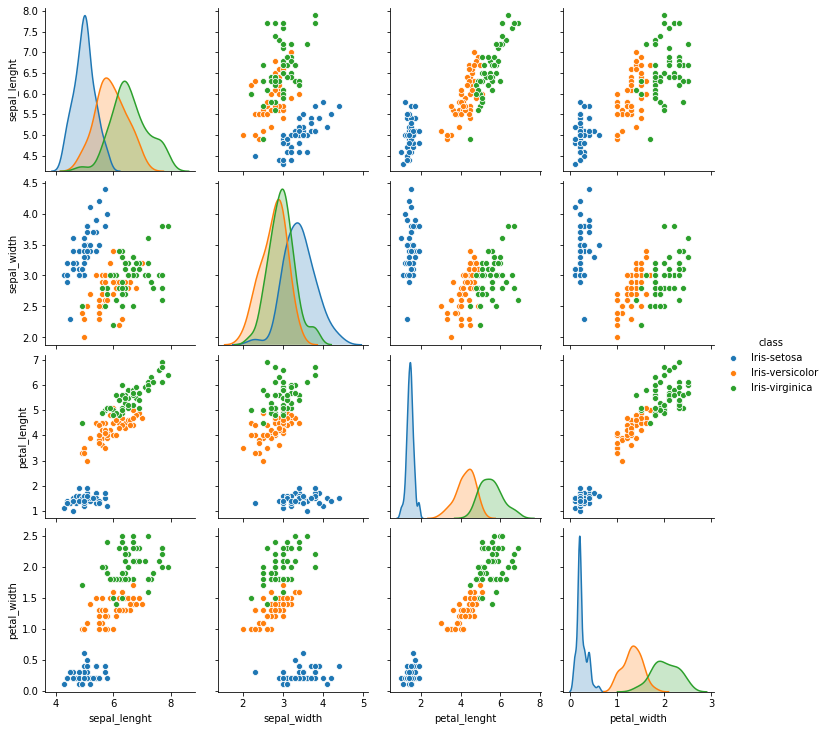

In [3]:
sns.pairplot(iris, hue='class')

In [4]:
X = iris.drop('class', axis = 1) #Features
y = iris['class'] #Labels

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
model = KNeighborsClassifier(n_neighbors = 10, metric = 'manhattan')
model.fit(X,y)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [7]:
sample = np.array([4.5, 3.2, 1.6, 0.5])
model.predict([sample])

array(['Iris-setosa'], dtype=object)

In [10]:
#Guaging the value of k
score = []
for i in range(1,40):
    knn = KNeighborsClassifier(i).fit(X,y)
    score.append(knn.score(X,y))
    

In [11]:
score

[1.0,
 0.98,
 0.96,
 0.96,
 0.9666666666666667,
 0.9733333333333334,
 0.9733333333333334,
 0.98,
 0.98,
 0.98,
 0.9733333333333334,
 0.98,
 0.98,
 0.98,
 0.9866666666666667,
 0.9866666666666667,
 0.98,
 0.9733333333333334,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.9733333333333334,
 0.98,
 0.9733333333333334,
 0.9733333333333334,
 0.9666666666666667,
 0.9733333333333334,
 0.9533333333333334,
 0.96,
 0.9533333333333334,
 0.96,
 0.96,
 0.96,
 0.9533333333333334,
 0.96,
 0.9466666666666667,
 0.9533333333333334]

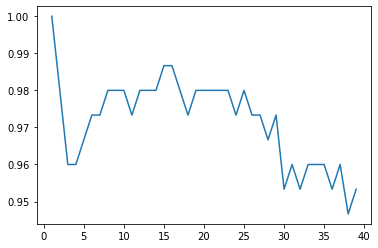

In [12]:
plt.plot(np.arange(1,40), score)

In [13]:
## Helper function to help you visualize your decision boundaries

def plot_classifier(model, features, labels):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    h = .02  # step size in the mesh
    X = features.values[:, :2] # converting dataframe into numpy array
    y = labels.values
    
    map_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
    y = np.array(list(map(lambda a: map_dict[a],list(y))))

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    model.fit(X,y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("{} classification".format(model))

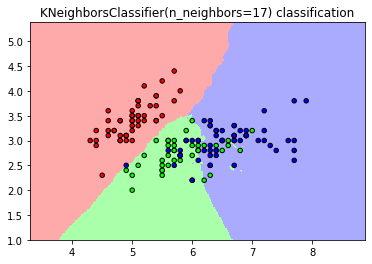

In [18]:
plot_classifier(KNeighborsClassifier(17), X, y) # lets look at our decesion boundary